# A Quick Example: Some Visualisations on Harold Shipman's Cases

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_context("talk")
sns.set_context("notebook")
sns.set({ "figure.figsize": (12*1.5, 6*1.5) })

## Essentials of Running/Navigating/Editing Notebooks

- **command** and **edit** modes.
- *command*: affects the structure of the notebook; *edit*: the content of a cell.
- there is a menu, but `H` gives an overview of keyboard shortcuts for both modes (the latter will make your workflow more efficient).
- `Enter` will enable _edit_ mode in a cell.
- `Esc` brings you back from _edit_ to _command_ mode.
- `Shift+Enter` evaluates the content of a cell.
- `M` makes a cell of the type _Markdown_ (for human-readable, lightweight-formatted text); `Y` changes it to code.
- `A` create a new cell above the current one; `B`, below.
- there was a cheatsheet [here](https://conferences.oreilly.com/jupyter/jup-ny/public/content/jupyter-shortcuts); it seems now to have been placed [here](https://treehouse-code-samples.s3.amazonaws.com/Python/jupyter-shortcuts.pdf).
- but there is an overview of the Markdown syntax [here](https://guides.github.com/features/mastering-markdown/).


## Links from The Art of Statistics for Shipman's Example

* [David Spiegelhalter's GitHub for the book](https://github.com/dspiegel29/ArtofStatistics).

* Within Spiegelhalter's area, the resources for age and year of victims are [here](https://github.com/dspiegel29/ArtofStatistics/tree/master/00-1-age-and-year-of-deathofharold-shipmans-victims), and comparable percentages for times of deaths are [here](https://github.com/dspiegel29/ArtofStatistics/tree/master/00-2-shipman-times). The raw datasets, respectively, are [here](https://raw.githubusercontent.com/dspiegel29/ArtofStatistics/master/00-1-age-and-year-of-deathofharold-shipmans-victims/00-1-shipman-confirmed-victims-x.csv) and [here](https://raw.githubusercontent.com/dspiegel29/ArtofStatistics/master/00-2-shipman-times/00-2-shipman-times-x.csv).

## Importing/Loading/Inspecting the Datasets

In [2]:
cases_df = pd.read_csv('https://raw.githubusercontent.com/dspiegel29/ArtofStatistics/master/00-1-age-and-year-of-deathofharold-shipmans-victims/00-1-shipman-confirmed-victims-x.csv', parse_dates=["DateofDeath"])

In [3]:
cases_df.head()

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,1975-03-17,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,1978-08-07,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,1978-08-30,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,1978-12-07,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,1978-12-20,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


In [4]:
cases_df = cases_df.rename(columns={ 'gender': 'gender_01'}).rename(columns={ 'gender2': 'gender' })
cases_df.head()

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender_01,fractionalDeathYear,ageBracket,gender
0,1975-03-17,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,1978-08-07,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,1978-08-30,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,1978-12-07,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,1978-12-20,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


## Shipman's Confirmed Victims: Year of Death, Age, Gender

Text(0.5, 0, 'Year of Death')

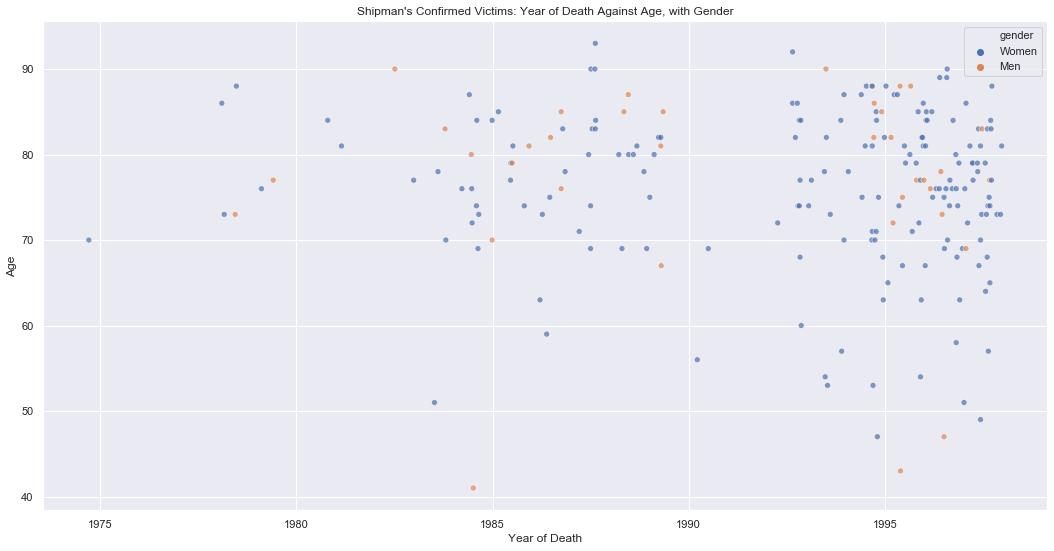

In [7]:
ax = sns.scatterplot(data=cases_df, x='fractionalDeathYear', y='Age', hue='gender', alpha=0.7)
ax.set_title('Shipman\'s Confirmed Victims: Year of Death Against Age, with Gender')
ax.set_xlabel('Year of Death')
# ax.get_figure().savefig('../figures/shipman-cases-deathyear-age-gender.png', pad_inches=0.1, bbox_inches='tight')

In [8]:
# !ls -lh ../figures/

## Shipman's Victims by Time of Day

In [9]:
times_df = pd.read_csv('https://raw.githubusercontent.com/dspiegel29/ArtofStatistics/master/00-2-shipman-times/00-2-shipman-times-x.csv', index_col='Hour')

In [10]:
times_df.head()

,Shipman,Comparison
Hour,,
0,2.6,1.1
1,1.0,3.0
2,2.6,3.1
3,3.0,3.8
4,0.3,4.0


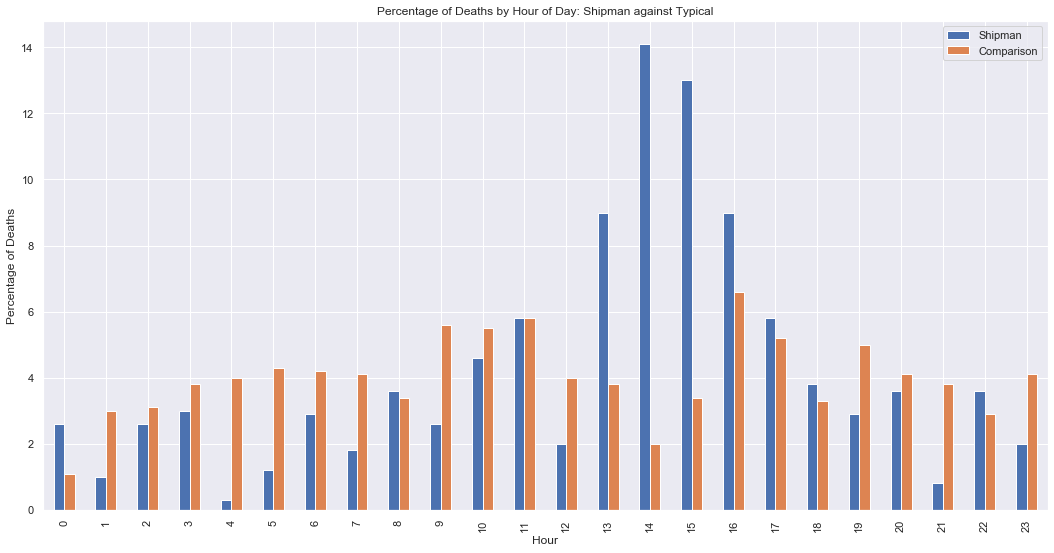

In [11]:
ax = times_df.plot.bar()
ax.set_title('Percentage of Deaths by Hour of Day: Shipman against Typical')
ax.set_ylabel('Percentage of Deaths')
fig = ax.get_figure()
# fig.savefig('../figures/shipman-time-percent.png', pad_inches=0.1, bbox_inches='tight');

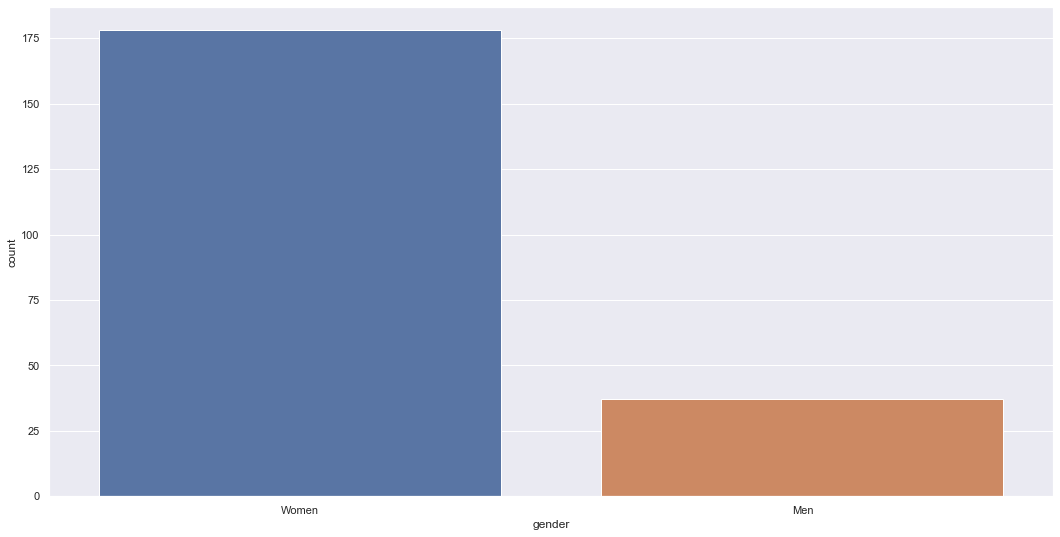

In [25]:
sns.countplot(cases_df['gender'])

In [19]:
cases_df['Age'].describe()

count    215.000000
mean      76.186047
std        9.625841
min       41.000000
25%       72.000000
50%       77.000000
75%       83.000000
max       93.000000
Name: Age, dtype: float64

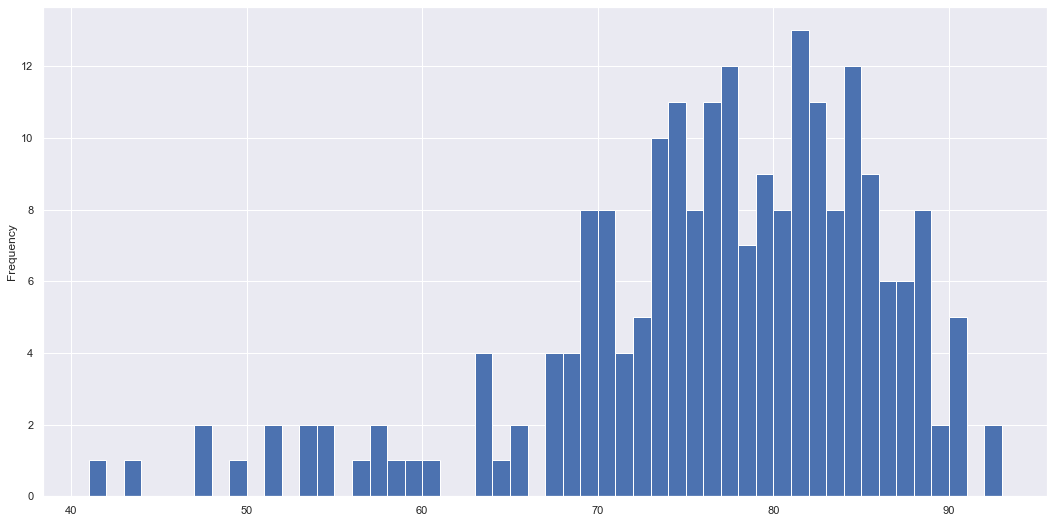

In [20]:
cases_df['Age'].plot.hist(52)

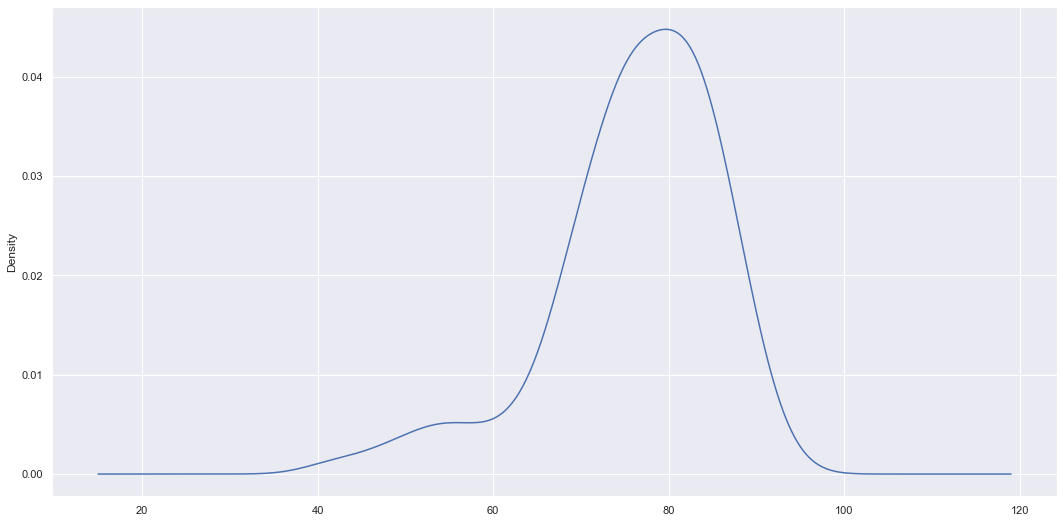

In [21]:
cases_df['Age'].plot.kde()

In [27]:
cases_df['yearOfDeath'].min()

1975

In [28]:
cases_df['yearOfDeath'].max()


1998

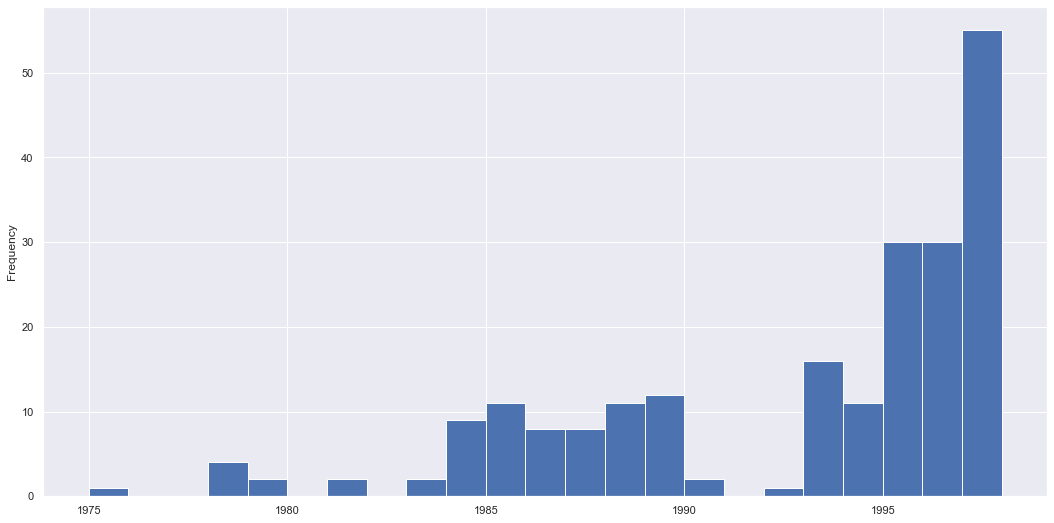

In [29]:
cases_df['yearOfDeath'].plot.hist(23)

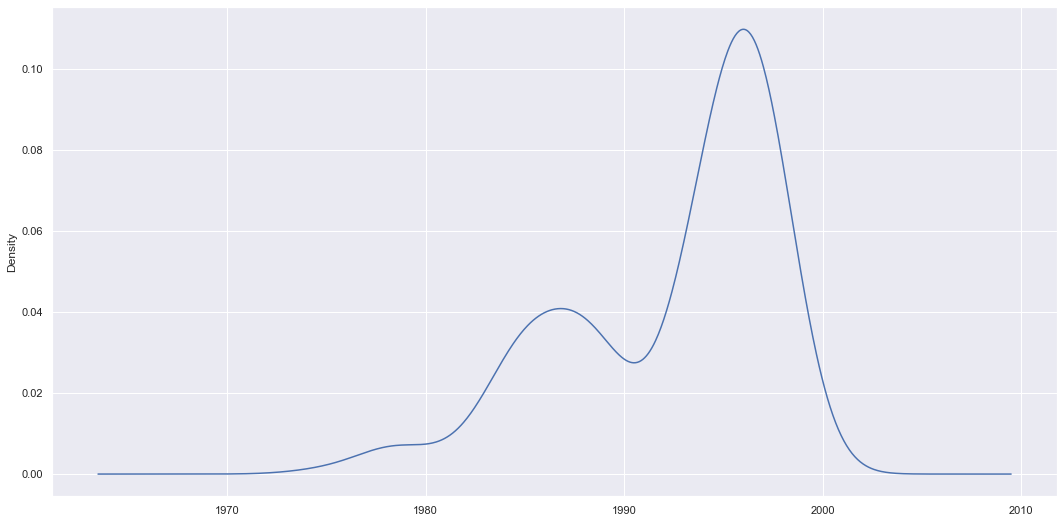

In [30]:
cases_df['yearOfDeath'].plot.kde()

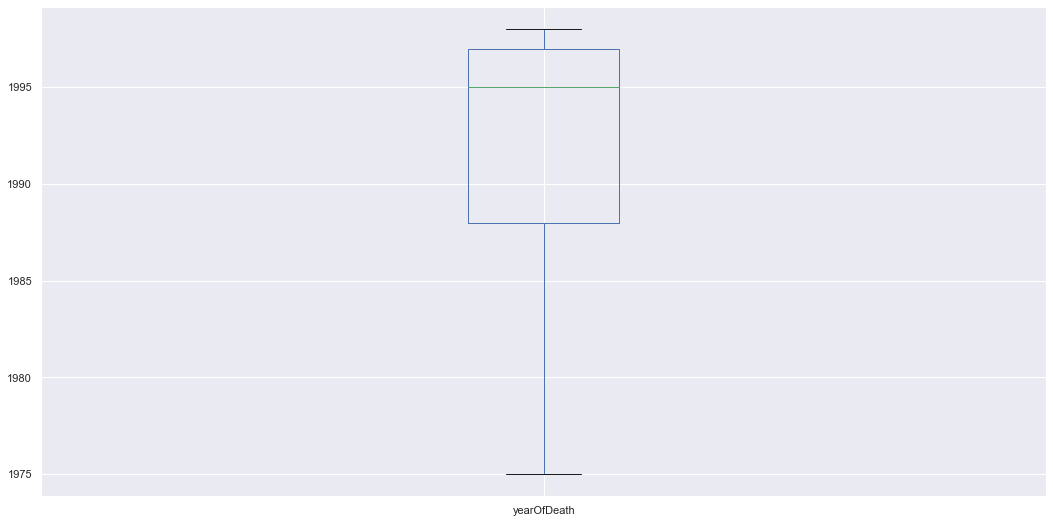

In [31]:
cases_df['yearOfDeath'].plot.box()